In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf

# Check TensorFlow version
print(tf.__version__)


2.15.0


In [2]:
# Importing the dataset
dataset = pd.read_csv("Churn_Modelling.csv")

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [5]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [6]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [7]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [8]:
X.shape

(10000, 10)

In [9]:
# # Display the features and labels
# print(X[:5])
# print(y[:5])

## Data Preprocessing

In [10]:
# Encoding categorical data
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [11]:
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
X.shape

(10000, 12)

## Model Training

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Building the ANN

# Initializing the ANN
ann = tf.keras.models.Sequential()

In [16]:
# Adding layers
ann.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=(X_train.shape[1],)))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))

In [17]:
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [18]:
# Summary
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 78        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
 dense_3 (Dense)             (None, 5)                 25        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 179 (716.00 Byte)
Trainable params: 179 (716.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Training the ANN

# Compiling the ANN
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# Training the ANN on the Training set
history = ann.fit(X_train, y_train, batch_size=30, epochs=20)

Epoch 1/20


267/267 [==============================] - 2s 1ms/step - loss: 0.4951 - accuracy: 0.7960
Epoch 2/20
267/267 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.7960
Epoch 3/20
267/267 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.7960
Epoch 4/20
267/267 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.7960
Epoch 5/20
267/267 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.7960
Epoch 6/20
267/267 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.7960
Epoch 7/20
267/267 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.7960
Epoch 8/20
267/267 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.7960
Epoch 9/20
267/267 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.7990
Epoch 10/20
267/267 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.80

## Saving Model

In [21]:
import joblib

# # Load the saved model
#model = tf.keras.models.load_model('best_model.h5')

# Save the trained model
ann.save('best_model.pkl')

# Save the preprocessing objects
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(ct, 'column_transformer.pkl')
joblib.dump(sc, 'scaler.pkl')

INFO:tensorflow:Assets written to: best_model.pkl\assets


INFO:tensorflow:Assets written to: best_model.pkl\assets


['scaler.pkl']

In [22]:
# Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = ann.predict(X_test)
y_pred_1 = (y_pred > 0.5).astype(int)

63/63 [==============================] - 0s 1ms/step


In [23]:
# Display predictions alongside actual results
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))

[[0.15919134 0.        ]
 [0.28408614 1.        ]
 [0.18434317 0.        ]
 ...
 [0.21027316 0.        ]
 [0.17141569 0.        ]
 [0.17828225 0.        ]]


In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_1)
print(cm)

[[1557   38]
 [ 286  119]]


In [25]:
ac = accuracy_score(y_test, y_pred_1)
print(f'Accuracy: {ac:.2f}')

Accuracy: 0.84


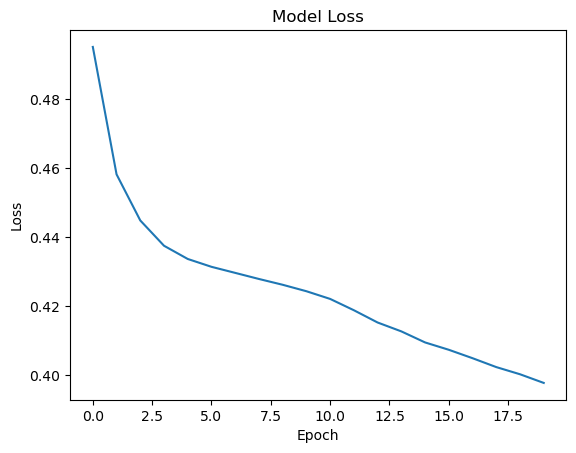

In [26]:
# Optional: Plotting the training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [27]:
# # Optional: Plotting the training loss and validation loss
# import matplotlib.pyplot as plt
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [28]:
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [29]:
ann.save('churn_model.h5')

C:\Users\SAMEER\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Predicting with values 

In [30]:
# Load the saved model
loaded_model = tf.keras.models.load_model('churn_model.h5')

# Assume you have new data in a Pandas dataframe called `new_data`
new_data = pd.DataFrame({
   'CreditScore': [600, 700], 
    'Geography': ['France', 'Spain'], 
    'Gender': ['Male', 'Female'], 
    'Age': [40, 50], 
    'Tenure': [5, 10], 
    'Balance': [60000, 70000], 
    'NumOfProducts': [2, 1], 
    'HasCrCard': [1, 0], 
    'IsActiveMember': [1, 1], 
    'EstimatedSalary': [50000, 60000]})

# Preprocess the new data (same steps as before)
new_data = pd.get_dummies(new_data, columns=['Geography',"Gender"])
new_data = sc.transform(new_data)

# Make predictions on the new data
new_predictions = loaded_model.predict(new_data)

# Convert predictions to 0 or 1 (since it's a binary classification problem)
# new_predictions = (new_predictions > 0.5).astype(int)

# Print the results
for pred in new_predictions:
    if pred == 0:
        print("cust Will not churn")
    else:
        print("cust Will churn")

C:\Users\SAMEER\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
cust Will not churn
cust Will not churn


In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
import joblib
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load the saved model
model = tf.keras.models.load_model('best_model.pkl')

# Load the preprocessing objects
le = joblib.load('label_encoder.pkl')
ct = joblib.load('column_transformer.pkl')
sc = joblib.load('scaler.pkl')

# Assuming the new data is in a DataFrame format
new_data = pd.DataFrame({
    'CreditScore': [600, 700], 
    'Geography': ['France', 'Spain'], 
    'Gender': ['Male', 'Female'], 
    'Age': [40, 50], 
    'Tenure': [5, 10], 
    'Balance': [60000, 70000], 
    'NumOfProducts': [2, 1], 
    'HasCrCard': [1, 0], 
    'IsActiveMember': [1, 1], 
    'EstimatedSalary': [50000, 60000]
})

# Encoding categorical data using the loaded LabelEncoder and ColumnTransformer

# Preprocess the new data (same steps as before)
new_data = pd.get_dummies(new_data, columns=['Geography',"Gender"])
new_data = sc.transform(new_data)

# Feature Scaling using the loaded StandardScaler
new_data = sc.transform(new_data)

# Predicting the new data
predictions = model.predict(new_data)
#predictions_binary = (predictions > 0.5).astype(int)

# Display predictions
print(predictions)
#print(predictions_binary)

for pred in predictions:
    if pred == 0:
        print("Will not churn")
    else:
        print("Will churn")

1/1 [==============================] - 0s 103ms/step
[[0.]
 [0.]]
Will not churn
Will not churn


C:\Users\SAMEER\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [32]:
# Load the saved model
loaded_model = tf.keras.models.load_model('churn_model.h5')

# Assume you have new data in a Pandas dataframe called `new_data`
new_data = pd.DataFrame({
   'CreditScore': [600, 0], 
    'Geography': ['France', 'Spain'], 
    'Gender': ['Male', 'Female'], 
    'Age': [40, 50], 
    'Tenure': [5, 10], 
    'Balance': [60000, 700], 
    'NumOfProducts': [2, 1], 
    'HasCrCard': [1, 0], 
    'IsActiveMember': [1, 1], 
    'EstimatedSalary': [50000, 600]})

# Preprocess the new data (same steps as before)
new_data = pd.get_dummies(new_data, columns=['Geography',"Gender"])
new_data = sc.transform(new_data)

# Make predictions on the new data
# new_predictions = loaded_model.predict(new_data)

# Convert predictions to 0 or 1 (since it's a binary classification problem)
# new_predictions = (new_predictions > 0.5).astype(int)

# Print the results
for i, pred in enumerate(new_predictions):
    if pred == 0:
        print(f"Customer {i+1} is not likely to churn.")
    else:
        print(f"Customer {i+1} is likely to churn.")

Customer 1 is not likely to churn.
Customer 2 is not likely to churn.


C:\Users\SAMEER\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


### Model is working and predicting well 